In [1]:
#Atividade Modelo Baseado em Distância - Aprendizado de Máquina IFES
#João Pedro da Silva Rodrigues
#
#Algoritmo de Rocchio

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# importando o dataset iris
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names




In [2]:
X.shape

(150, 4)

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler





#normalização 
sc = StandardScaler()
X= sc.fit_transform(X)     #np.c_[(x-x.mean())/x.std()]
Z = np.c_[X, y]

pca = PCA(n_components=X.shape[1])
pca.fit(Z.T)

cov = np.cov(X.T) 
eigenvalues, eigenvectors = np.linalg.eig(cov)

In [4]:
from pandas import DataFrame

loadings = DataFrame(pca.components_.T)
loadings.index = ['PC %s' % pc for pc in loadings.index + 1]
loadings.columns = ['TS %s' % pc for pc in loadings.columns + 1]
loadings

,TS 1,TS 2,TS 3,TS 4
PC 1,0.092943,0.104035,0.043400,-0.005400
PC 2,0.036432,0.102649,0.029755,-0.006698
PC 3,0.061496,0.115797,-0.015554,0.010166
PC 4,0.048837,0.114861,-0.034256,0.062747
PC 5,0.105050,0.109851,0.019595,0.014173
...,...,...,...,...
PC 146,-0.077217,0.058517,0.005727,-0.242539
PC 147,-0.123847,0.080340,0.019423,-0.103950
PC 148,-0.070795,0.075627,0.013306,-0.097303
PC 149,-0.029917,0.082703,-0.113046,-0.105888


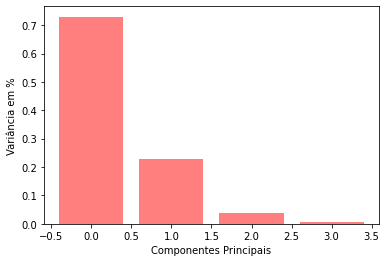

In [5]:
import matplotlib.pyplot as plt

tot_soma = sum(eigenvalues)
var_exp = [(i / tot_soma) for i in sorted(eigenvalues, reverse=True)] #do maior para o menor valor de autovalores
cum_var_exp = np.cumsum(var_exp)

plt.bar( range(0,4), var_exp, alpha=0.5, color = 'r')

plt.ylabel('Variância em %')
plt.xlabel('Componentes Principais')

plt.show()

Text(0.5, 0, 'PCs')

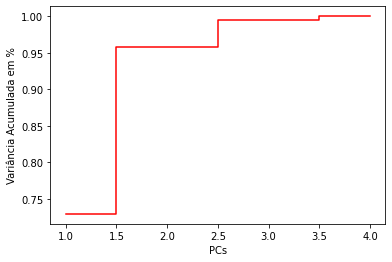

In [6]:
plt.step( range(1,X.shape[1]+1), cum_var_exp, where='mid', color = 'r')
plt.ylabel('Variância Acumulada em %')
plt.xlabel('PCs')

In [37]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss


nr = NearMiss() #Undersampling
smt = SMOTE() #Oversampling

X = iris.data[:, :3]
y = iris.target[:X.shape[0]]
y=np.reshape(y,(y.shape[0],1))
print(X.shape,y.shape)
# Split the data into a training set and a test set

X, y = smt.fit_sample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

(150, 3) (150, 1)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import NearestCentroid

clf = NearestCentroid()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


Automatically created module for IPython interactive environment


Confusion matrix, without normalization
[[16  0  0]
 [ 0 15  3]
 [ 0  4  7]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.83 0.17]
 [0.   0.36 0.64]]


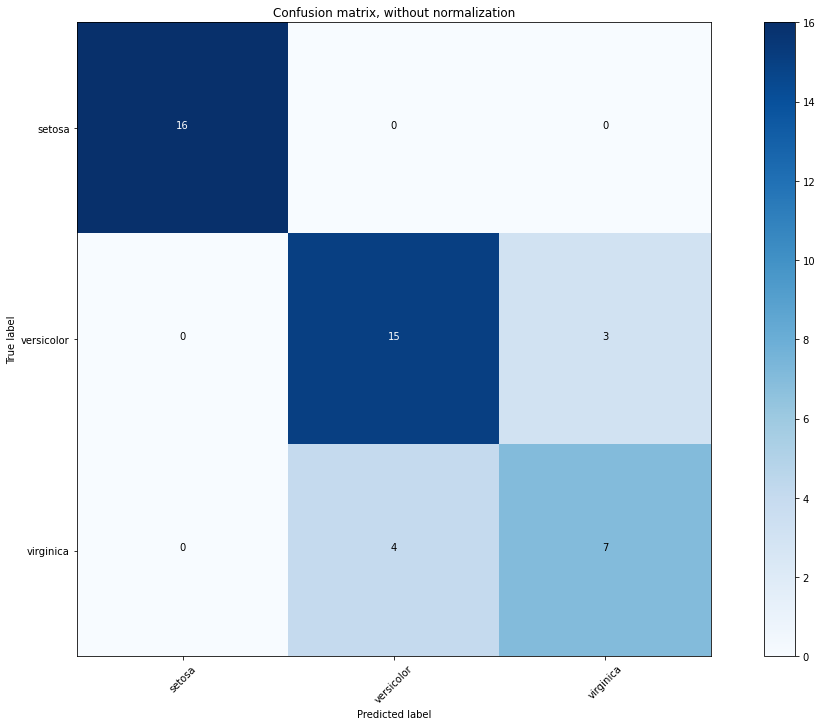

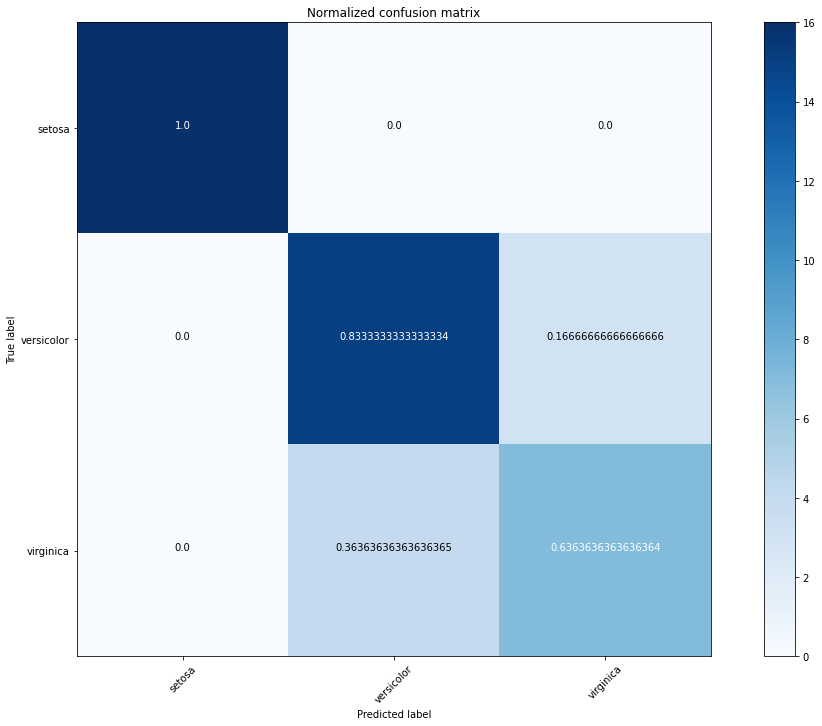

In [39]:



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(15,10))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix

plt.figure(figsize=(15,10))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,title='Normalized confusion matrix')

plt.show()

In [41]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test,y_pred,digits=5, target_names=iris.target_names))


              precision    recall  f1-score   support

      setosa    1.00000   1.00000   1.00000        16
  versicolor    0.78947   0.83333   0.81081        18
   virginica    0.70000   0.63636   0.66667        11

    accuracy                        0.84444        45
   macro avg    0.82982   0.82323   0.82583        45
weighted avg    0.84246   0.84444   0.84284        45



In [34]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

def ROC_E_AUC(y_Pred,Y_val):
    lw=2
    n_classes=3
    # Binarize the output
    Y_val= label_binarize(Y_val, classes=[0, 1, 2])
    n_classes = Y_val.shape[1]

    y_Pred= label_binarize(y_Pred, classes=[0, 1, 2])

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_val[:, i], y_Pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(Y_val.ravel(), y_Pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(15, 10))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.savefig("Curva_ROC_6_movimentos_RGB_1-1_CICLO_NA_NORMALIZAÇÃO.png")
    plt.show()
    print(roc_auc)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


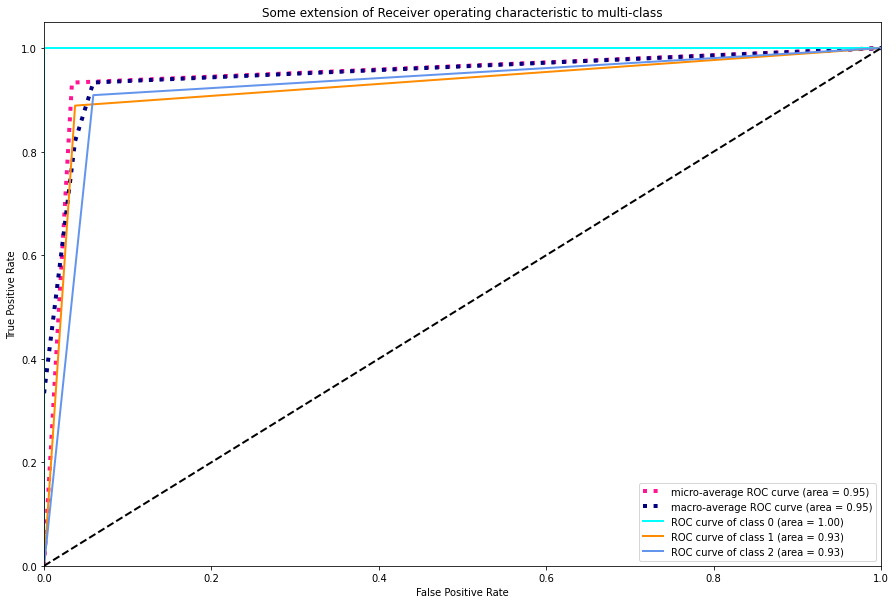

{0: 1.0, 1: 0.925925925925926, 2: 0.9251336898395722, 'micro': 0.95, 'macro': 0.9503532052551661}


In [35]:
ROC_E_AUC(y_pred,y_test)